In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/content/sales_data_with_discounts.csv')


In [ ]:
# Descriptive Analysis

In [ ]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [ ]:
df.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [ ]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [ ]:
# Data Visualization

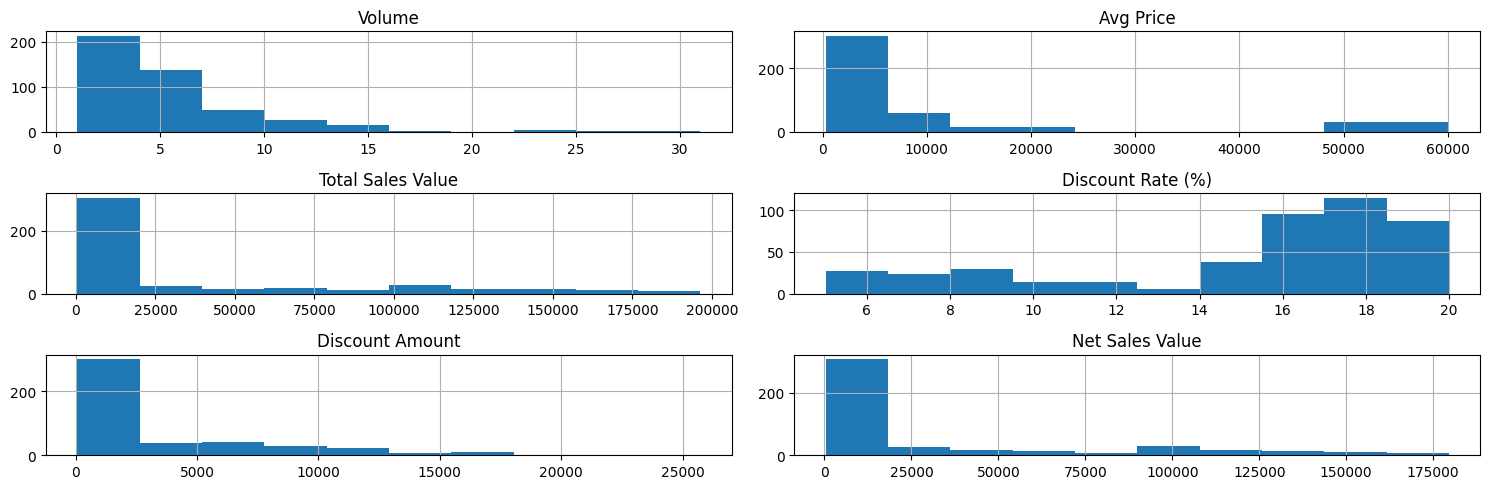

In [ ]:
df.hist(figsize=(15,5))
plt.tight_layout()
plt.show()

<Axes: ylabel='Volume'>

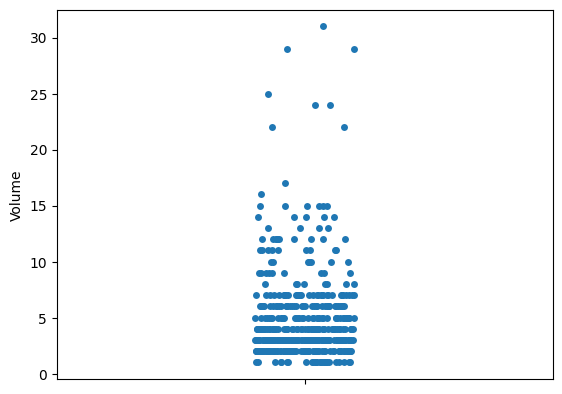

In [ ]:
sns.stripplot(y='Volume', data=df)

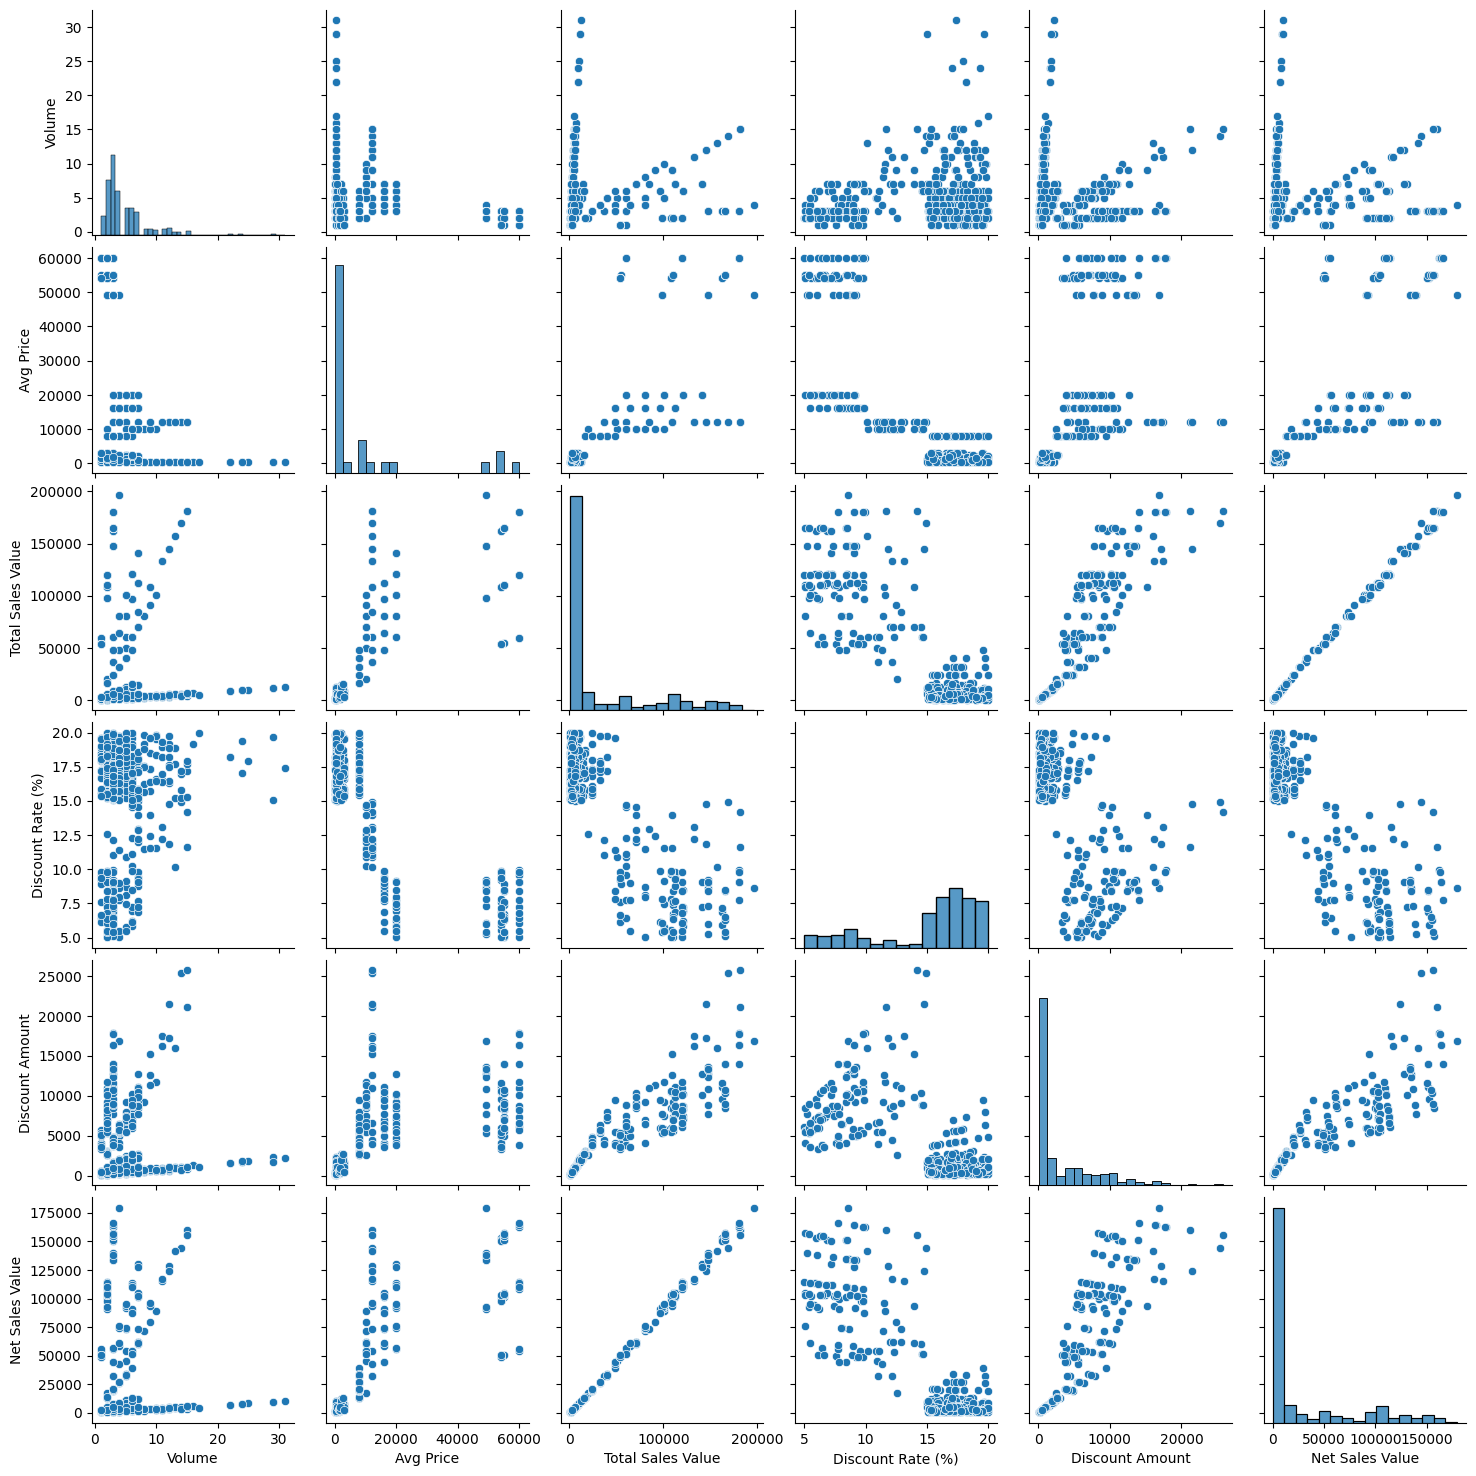

In [ ]:
sns.pairplot(df)
plt.show()

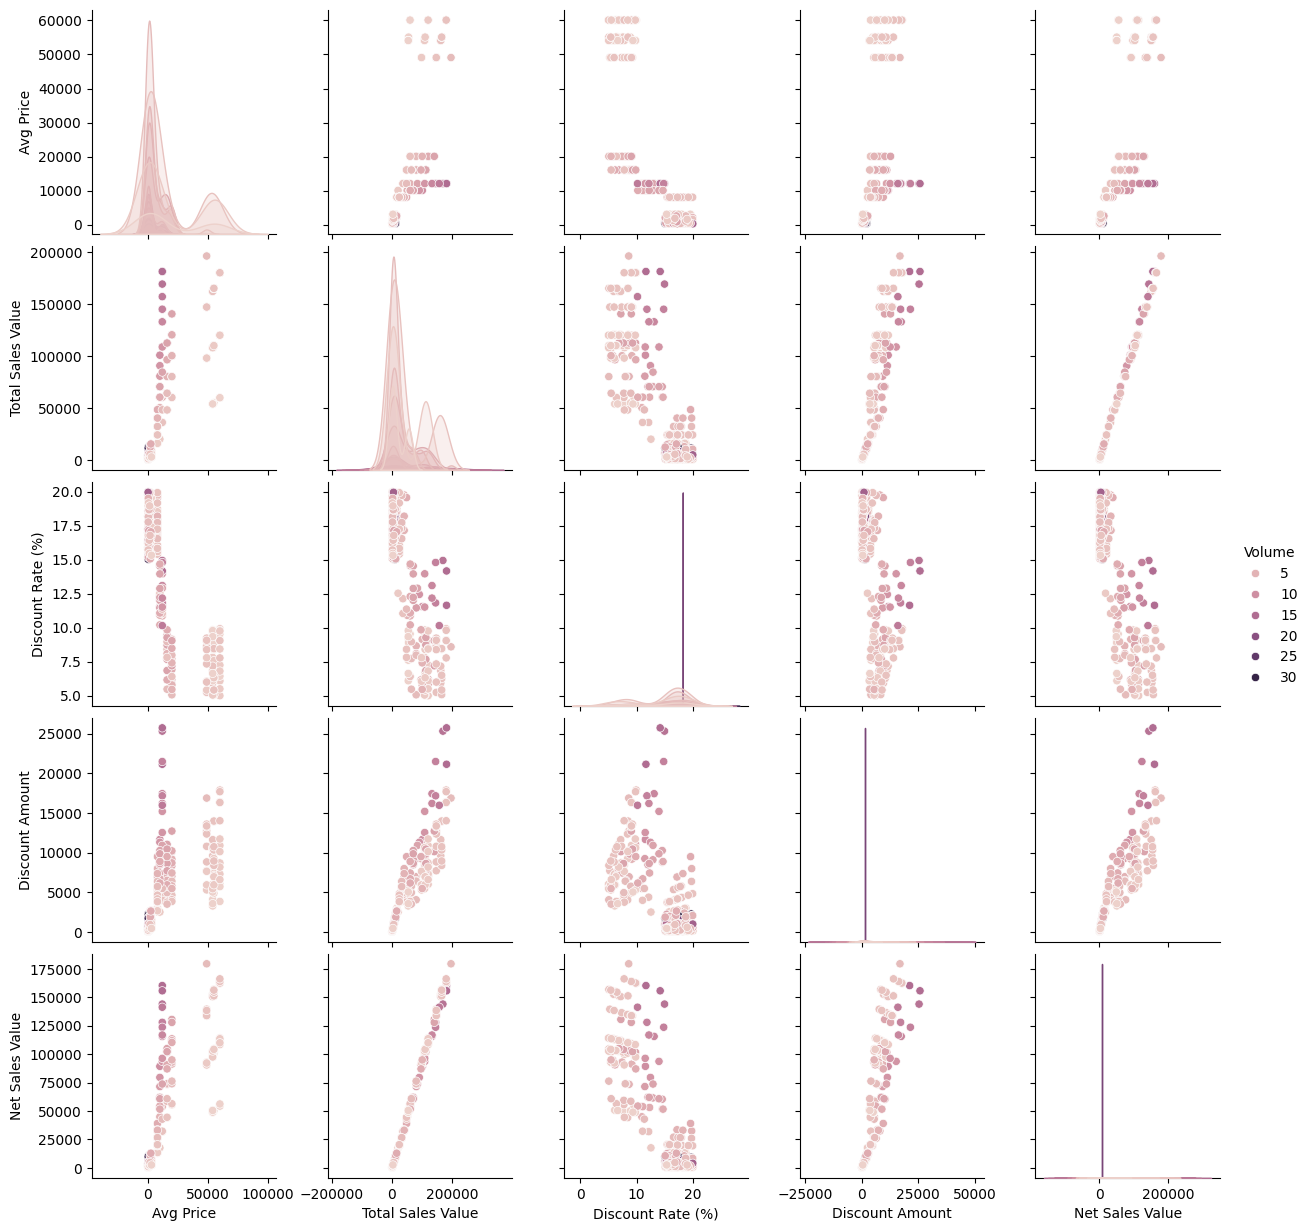

In [ ]:
sns.pairplot(df, hue='Volume')
plt.show()


<Figure size 60000x3000 with 0 Axes>

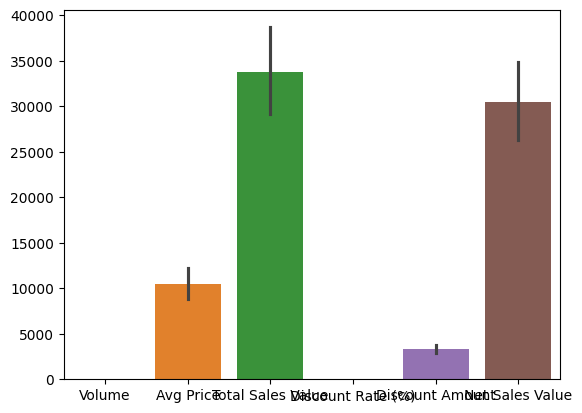

<Figure size 60000x3000 with 0 Axes>

In [ ]:
sns.barplot(df)
plt.figure(figsize=(600,30))


<Axes: xlabel='Volume'>

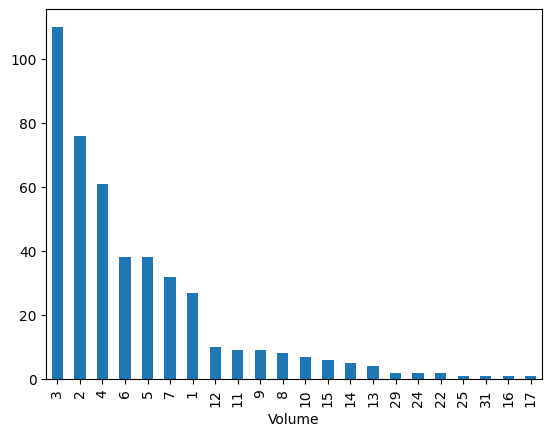

In [ ]:
df['Volume'].value_counts().plot.bar()

<Axes: xlabel='Day'>

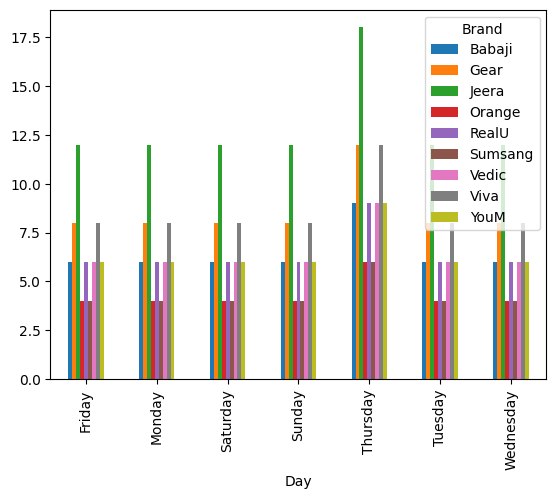

In [ ]:
pd.crosstab(df['Day'],df['Brand']).plot(kind='bar')

In [6]:
# Standardization (z-score normalization) is a method to scale numerical variables to have a mean of 0 and a standard deviation of 1.
# The formula for standardization is: z = (x - mu) / sigma

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Standardize the numerical columns
standardized_df = df.copy()
for column in numerical_columns:
    mu = df[column].mean()
    sigma = df[column].std()
    standardized_df[column] = (df[column] - mu) / sigma

# before and after comparisons of the data distributions
print("Before Standardization:")
print(df[numerical_columns].describe())

print("\
After Standardization:")
print(standardized_df[numerical_columns].describe())

Before Standardization:
           Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
mean     5.066667  10453.433333       33812.835556          15.155242   
std      4.231602  18079.904840       50535.074173           4.220602   
min      1.000000    290.000000         400.000000           5.007822   
25%      3.000000    465.000000        2700.000000          13.965063   
50%      4.000000   1450.000000        5700.000000          16.577766   
75%      6.000000  10100.000000       53200.000000          18.114718   
max     31.000000  60100.000000      196400.000000          19.992407   

       Discount Amount  Net Sales Value  
count       450.000000       450.000000  
mean       3346.499424     30466.336131  
std        4509.902963     46358.656624  
min          69.177942       326.974801  
25%         460.459304      2202.208645  
50%         988.933733      4677.788059  
75%        5316.495427  

In [7]:
# Explain the need for one-hot encoding
# Machine learning algorithms require numerical input, so categorical variables need to be converted into a numerical format.
# One-hot encoding creates binary columns for each category, allowing algorithms to interpret categorical data.

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding
one_hot_encoded_df = pd.get_dummies(df, columns=categorical_columns)

# Display a portion of the transformed dataset
print(one_hot_encoded_df.head())

   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Vedic Oil  \
0            False  ...

In [ ]:
#Conclusion:

'''Key findings from the descriptive analytics and data visualizations:

We standardized numerical variables to have a mean of 0 and standard deviation of 1, which helps in comparing variables on different scales.
Categorical variables were transformed using one-hot encoding, creating a more suitable format for machine learning algorithms.
Importance of data preprocessing steps:'''

#Standardization:

'''Ensures all numerical features are on the same scale, preventing features with larger magnitudes from dominating the analysis.
Improves the performance and convergence of many machine learning algorithms.'''

#One-hot encoding:

'''Allows categorical data to be used in algorithms that require numerical input.
They make the data more suitable for various algorithms, improving model performance and reliability.
They allow for more meaningful comparisons between different features and more accurate interpretation of model results.
By applying these techniques, we've prepared our sales data for more advanced analysis and modeling, setting a strong
foundation for deriving valuable insights and building predictive models.'''